# SpaceWars

> The location of reporting the Great War in France, Austria and Finland – investigating the places dominating news reporting during the Great War between 1914 and 1918

- https://platform.newseye.eu/

## Theoretical reflections

- "In a phenomenological sense, place has often been described as
space engendered with meaning through human experience (either direct or indirect)"
(Tuan, 1977)

- "Historical datasets pose unique challenges, however, as many geoparsing tools are built on gazetteers of modern place names, and therefore custom solutions are often required to automatically extract geographic information
from historical texts" (Rupp et al, 2013)
    - https://pleiades.stoa.org/
    - http://whgazetteer.org/
    
#### Place relations in virtual or cognitive space
"[...] texts, such as Web pages, social media posts, and news articles, can mention multiple places that are far apart and even in global scale, thereby relating these places together, often representing social, economic, and historical relationships that are non-spatially determined" (Adams, 2018)

"Places can be related together in texts for a variety of reasons.
- News articles can report different events that involve multiple places: a sports team may travel from their hometown to another city for a game;
- a company based in one country may establish a new branch office in another country (Toly et al, 2012; Sassen, 2016);
- a natural disaster, such as hurricane and flooding, can impact multiple cities and
towns."

&xrArr; hence the notion of place name co-occurrences (Hecht and Raubal, 2008;
Twaroch et al, 2009; Ballatore et al, 2014; Liu et al, 2014; Spitz et al, 2016).

- Liu et al (2014) examined place name co-occurrences in a set of news articles, and found that place relatedness in news articles has a weaker distance decay effect compared with those derived from human movements.
- Zhong et al (2017) also looked into place name cooccurrences in news articles, and concluded that places are more likely to be related
if they are in the same administrative level or have a part-whole relation (e.g., Seattle is part of Washington State)

- <span style="color: blue">Adams and Gahegan (2016) performed spatio-temporal (chronotopic) analysis on Wikipedia corpus by analyzing the co-occurrences of places and times in texts to understand the intrinsic relations between place, space, and time in narrative texts.</span>

## Methodological considerations

"Harvesting geospatial data from unstructured texts has been frequently studied
in geographic information retrieval (GIR) under the topic of geoparsing (Jones and
Purves, 2008; Purves et al, 2018)."

**Working hypothesis**:
> [...] a textual corpus containing documents which are associated with locations on
the Earth, certain words and phrases can be more or less likely to be associated
with specific locations.

<div style="text-align: center">
    <img src="./img/methodology.jpg" width=75%>
</div>

### 1. Toponym recognition
> recognize the placenames, or toponyms, mentioned in texts

&xrArr; "<u>Washington</u> was an important stop on the rugged Southwest Trail."

#### Challenges
- <u>Informal/vernacular spellings</u>
    > https://www.yourplacenames.com/vernacular/ (Twaroch and Jones; 2010)

- <u>implicit place name mentions</u>
    > *geo-indicative*, but inherently non-spatial words: *beach*, *sunshine* (Adams and Janowicz, 2012)

- <u>False positives/negatives</u>

#### Approaches
##### Gazetteers
- geographic dictionary containing organized collections of place names, place types, and spatial footprints (Hill, 2000; Janowicz and Keßler, 2008).
- Since <span style="color:purple">humans refer to places via their names</span> while <span style="color:blue">machines represent places by their coordinates</span>, gazetteers fill the critical gap between informal human discourses and formal computer representations (Goodchild and Hill, 2008; Keßler et al, 2009a).

##### NLP
> identify place names without relying on a gazetteer (in the first place)
- recognition based on characteristic token/phrase cooccurrences:
    - "In the city of [MASK]"; "[MASK] Boulevard", etc.
    
- Often simply subtask of NER / WSD

### 2. Toponym resolution
> identify the corresponding instances and the location coordinates (points, lines, and polygons) of the recognized place names.

#### Challenges
- <u>place name ambiguity</u>
    > Which Washington? (Formally,) There are <u style="color:red">50 candidate places</u>!
    - even worse: ambiguities with other types of entities, e.g. person names


- <u>metonymy</u>
    > "<u>London</u> voted to pass an act" [GOV ENTITY]
    

#### Approaches
##### Domain Knowledge
- heuristic rules for disambiguation, e.g.
    - total population / largest total area
    - most prominent / default place instance
    - administrative hierarchies; capital or main city (Ladra et al; 2008)

    &xrArr; Gazetteers or even general-purpose search-engines (Li et al; 2002)

    - _one referent per document_  (Leidner, 2008)
        >  toponym that appears in different parts of the **same document** will most likely refer to the **same place instance**
        
##### (Semi-)Automatic Inference
- Mutual/pairwise toponym co-occurrence model to disambiguate from non-toponyms (Overell and Rüger; 2008)
- Conceptual density-based toponym disambiguation using external reference GeoSemCor; (Buscaldi and Rosso; 2008)
- Ensemble methods (Lieberman and Samet; 2011)
- Feature ensembles: incorporating geospatial distances to disambiguate candidate place instances (Santos et al; 2015)

##### Location inference from language modeling
> A variety of language models have been developed for geo-referencing texts **using
all the terms present in a document** rather than toponyms only

&xrArr; identify locations above and beyond place names (Tenbrink and Kuhn, 2011; Stock and Yousaf, 2018); target features: **spatial language**, i.e. spatial prepositions, adjectives, reference frames...
    
- classifiers trained to predict regions & geodesic grids (Roller
et al, 2012; Wing and Baldridge, 2014; Han et al, 2014)

- <span style="color: blue">language-independent Unicode character level classifier (Adams and McKenzie, 2018)</span>


#### Further reflections:
- Differentiation between a *locatum* (an object in space) and a *relatum* (another object that the locatum is related to), which can be used by a reader in a (geo)spatial scene to orient and locate the elements described in texts (Bateman et al, 2007)
-  Lexical dialectology (the study of dialects through computational means) can
be used to associate specific language features with places on the Earth, which in
turn can be used to improve the models for geo-locating texts (Rahimi et al, 2017;
Dunn, 2018)

#### Tools
##### General NER
- https://stanfordnlp.github.io/stanza/ner.html
- https://spacy.io/api/entityrecognizer
- https://demo.dbpedia-spotlight.org/
    - automatically links extracted entities to corresponding DBpedia concepts!<br>
    &xrArr; immediate geolocation
- https://www.refinitiv.com/en/products/intelligent-tagging-text-analytics

##### Dedicated Geoparsers
- https://github.com/geovista/GeoTxt (Karimzadeh et al, 2013)
- https://github.com/grantdelozier/TopoCluster (DeLozier et al, 2015)<br>
    - performs geoparsing <u>without using a gazetteer</u>!!!<br>
        &xrArr; leverages geographic profiles  of words in surrounding context!
    > The geographic profile of a word is the spatial distribution of the word characterized by local spatial statistics, and DeLozier et al (2015) derived geographic profiles of words using a set of geotagged Wikipedia articles
    
    &xrArr; essentially language modeling-based location inference

- https://github.com/Novetta/CLAVIN
    - Stanford NER + OpenNLP
    - gazetteer + fuzzy search
    <br>
    <br>
    
- https://geocoder.readthedocs.io/#

### Sources
- https://geoai.geog.buffalo.edu/

- War Of The Rebellion by DeLozier et al (2016)

In [102]:
import torch
import torch.nn as nn

x = torch.tensor([[1, 1, 1, 1, 1], [2, 2, 2, 2, 2]], dtype=torch.float).unsqueeze(0)

cnn1d = nn.Conv1d(in_channels=2, out_channels=2, kernel_size=3, bias=False)

print(cnn1d.weight)

cnn1d.forward(x)

Parameter containing:
tensor([[[-0.1692, -0.3216, -0.1085],
         [ 0.2504,  0.1952,  0.3656]],

        [[ 0.2659, -0.0931, -0.2213],
         [-0.1679,  0.3702, -0.3978]]], requires_grad=True)


tensor([[[ 1.0231,  1.0231,  1.0231],
         [-0.4395, -0.4395, -0.4395]]], grad_fn=<SqueezeBackward1>)

In [15]:
%%html
<div style="text-align: center"><iframe src="https://nominatim.openstreetmap.org/" width="75%" height="700"></iframe></div>

In [1]:
!ls data/export_hackathon

1913  1914  1915  1916	1917  1918  1919  1920


In [2]:
!ls data/export_hackathon/1913/

abo_underrattelser  illustrierte_kronen_zeitung  uusi_aura
arbeiter_zeitung    innsbrucker_nachrichten	 uusi_suometar
helsingin_sanomat   le_matin			 vastra_finland
hufvudstadsbladet   neue_freie_presse


- **journal**:
    - issue:
        ~~~json
        [
            {id, date, language, full_text, named_entities}
        ]
        ~~~
    - articles:
        ~~~json
        [
            {id, full_text, images, named_entities}
        ]
        ~~~

In [1]:
from mongoengine import connect

connect('spacewars')

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, read_preference=Primary())

In [2]:
import os
from os.path import join
from os import listdir

DATA_PATH = os.path.abspath('data/export_hackathon/')

[os.makedirs(join('entities', year), exist_ok=True) for year in listdir(DATA_PATH)]

[None, None, None, None, None, None, None, None]

In [ ]:
import json
import pandas as pd

import seaborn as sns


for root, dirs, files in os.walk(DATA_PATH):
    if root == DATA_PATH: continue
    print(root)
    subpath = root.split(DATA_PATH)[-1].split('/')
    
    if len(subpath) == 3:
        year = subpath[1]
        journal = subpath[2]
    else:
        continue
    
    locations = []
    
    for f in files:
        PATH = join(root, f)
        data = json.load(open(PATH))
        
        date = data['issue']['date']
        
        articles = data['articles']
        
        for article in articles:
            # if article['named_entities']:
            #    location_mentions = [ne['type'] == 'LOC' for ne in article['named_entities']]
            #    if True in location_mentions:
            #        lengths[year][journal].append(len(article['full_text']))
            
            if article['named_entities']:
                for ne in article['named_entities']:
                    if ne['type'] == 'LOC' and ne['link']:
                        ne['date'] = date
                        del ne['type']
                        locations.append(ne)
        
    with open(join('entities', year, f'{journal}.json'), 'w') as out:
        json.dump(locations, out)

In [10]:
data = pd.read_json('entities/1913/arbeiter_zeitung.json')

In [31]:
data

,id,link,type,mention,start_idx,end_idx,stance,date
0,entity_mention_arbeiter_zeitung_aze19130101_0,None,LOC,Aninehee,8,16,0,1913-01-01
1,entity_mention_arbeiter_zeitung_aze19130101_1,None,LOC,Rechte Wienzeile 87,18,37,0,1913-01-01
2,entity_mention_arbeiter_zeitung_aze19130101_2,None,LOC,I . Tchulerstraße,39,55,0,1913-01-01
3,entity_mention_arbeiter_zeitung_aze19130101_4,None,LOC,übermhmen,5,14,0,1913-01-01
4,entity_mention_arbeiter_zeitung_aze19130101_7,https://www.wikidata.org/wiki/Q284286,LOC,sit,105,108,0,1913-01-01
...,...,...,...,...,...,...,...,...
195561,entity_mention_arbeiter_zeitung_aze19131231_1061,None,LOC,"Mariahilferstraße 43 , 1 Stock",104,133,0,1913-12-31
195562,entity_mention_arbeiter_zeitung_aze19131231_1064,None,LOC,Redtenbachergasse 6,48,67,0,1913-12-31
195563,entity_mention_arbeiter_zeitung_aze19131231_1065,None,LOC,Breitegasse,5,16,0,1913-12-31
195564,entity_mention_arbeiter_zeitung_aze19131231_1068,None,LOC,Praterstrasse 8,92,107,0,1913-12-31


In [ ]:
import pandas as pd

for year in listdir('entities'):
    year_data = pd.DataFrame()
    for journal_json in listdir(join(f'entities/{year}')):
        if journal_json.startswith('.'): continue

        data = pd.read_json(f'entities/{year}/{journal_json}')
        print(year, journal_json)
        try:
            wiki_counts = pd.DataFrame(data.link.value_counts())
            wiki_counts.index = [url.split('/')[-1] for url in wiki_counts.index]
        except:
            print(data)
            break
        
        col = ''.join([tok[:4] for tok in journal_json.split('_')])
        
        wiki_counts.columns = [col]
        
        if year_data.empty:
            year_data = wiki_counts
        else:
            year_data = pd.concat((year_data, wiki_counts), axis=1)
    year_data.to_json(f'freqs/{year}.json')

In [16]:
data = pd.read_json('freqs/1920.json')

In [18]:
data.sort_values('illukronzeit', ascending=False)

,arbezeit,illukronzeit,innsnach,lemati,loeuv,neuefreipres
Q1741,7142.0,6435.0,10302.0,NaN,NaN,30290.0
Q1454534,71.0,982.0,7.0,NaN,NaN,1636.0
Q28,2558.0,595.0,1576.0,160.0,113.0,4634.0
Q64,2476.0,538.0,3720.0,1823.0,770.0,6430.0
Q1781,1552.0,498.0,1353.0,73.0,109.0,3907.0
...,...,...,...,...,...,...
Q470051,NaN,NaN,NaN,NaN,NaN,1.0
Q271300,NaN,NaN,NaN,NaN,NaN,1.0
Q12179,NaN,NaN,NaN,NaN,NaN,1.0
Q1426007,NaN,NaN,NaN,NaN,NaN,1.0


In [14]:
data.fillna(0, inplace=True)

<AxesSubplot:>

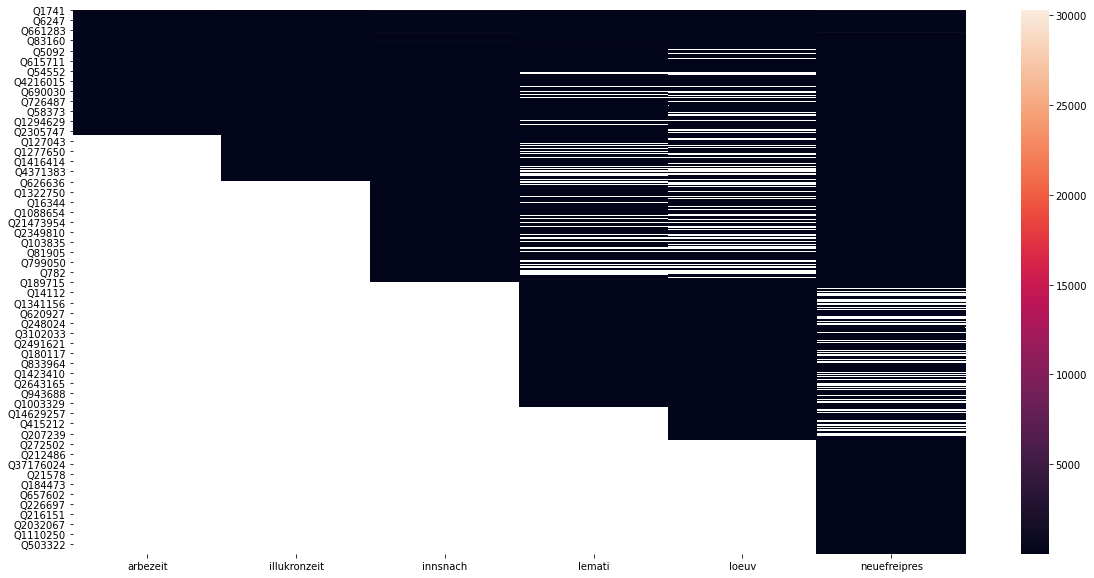

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

sns.heatmap(data)

In [115]:
import json

with open('location_article_lengths', 'w') as out:
    json.dump(lengths, out)

<AxesSubplot:ylabel='Count'>

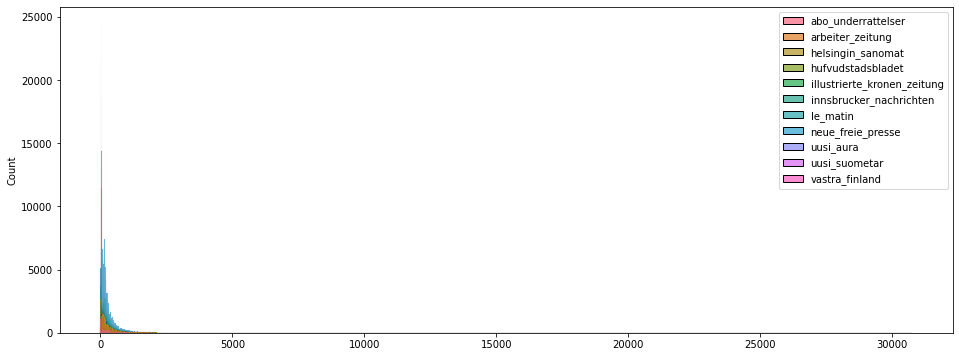

In [116]:
plt.figure(figsize=(16, 6))
sns.histplot(lengths['1913'])

In [111]:
lengths.keys()

dict_keys(['1913', '1914', '1915', '1916', '1917', '1918', '1919', '1920'])

/home/vagrant/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


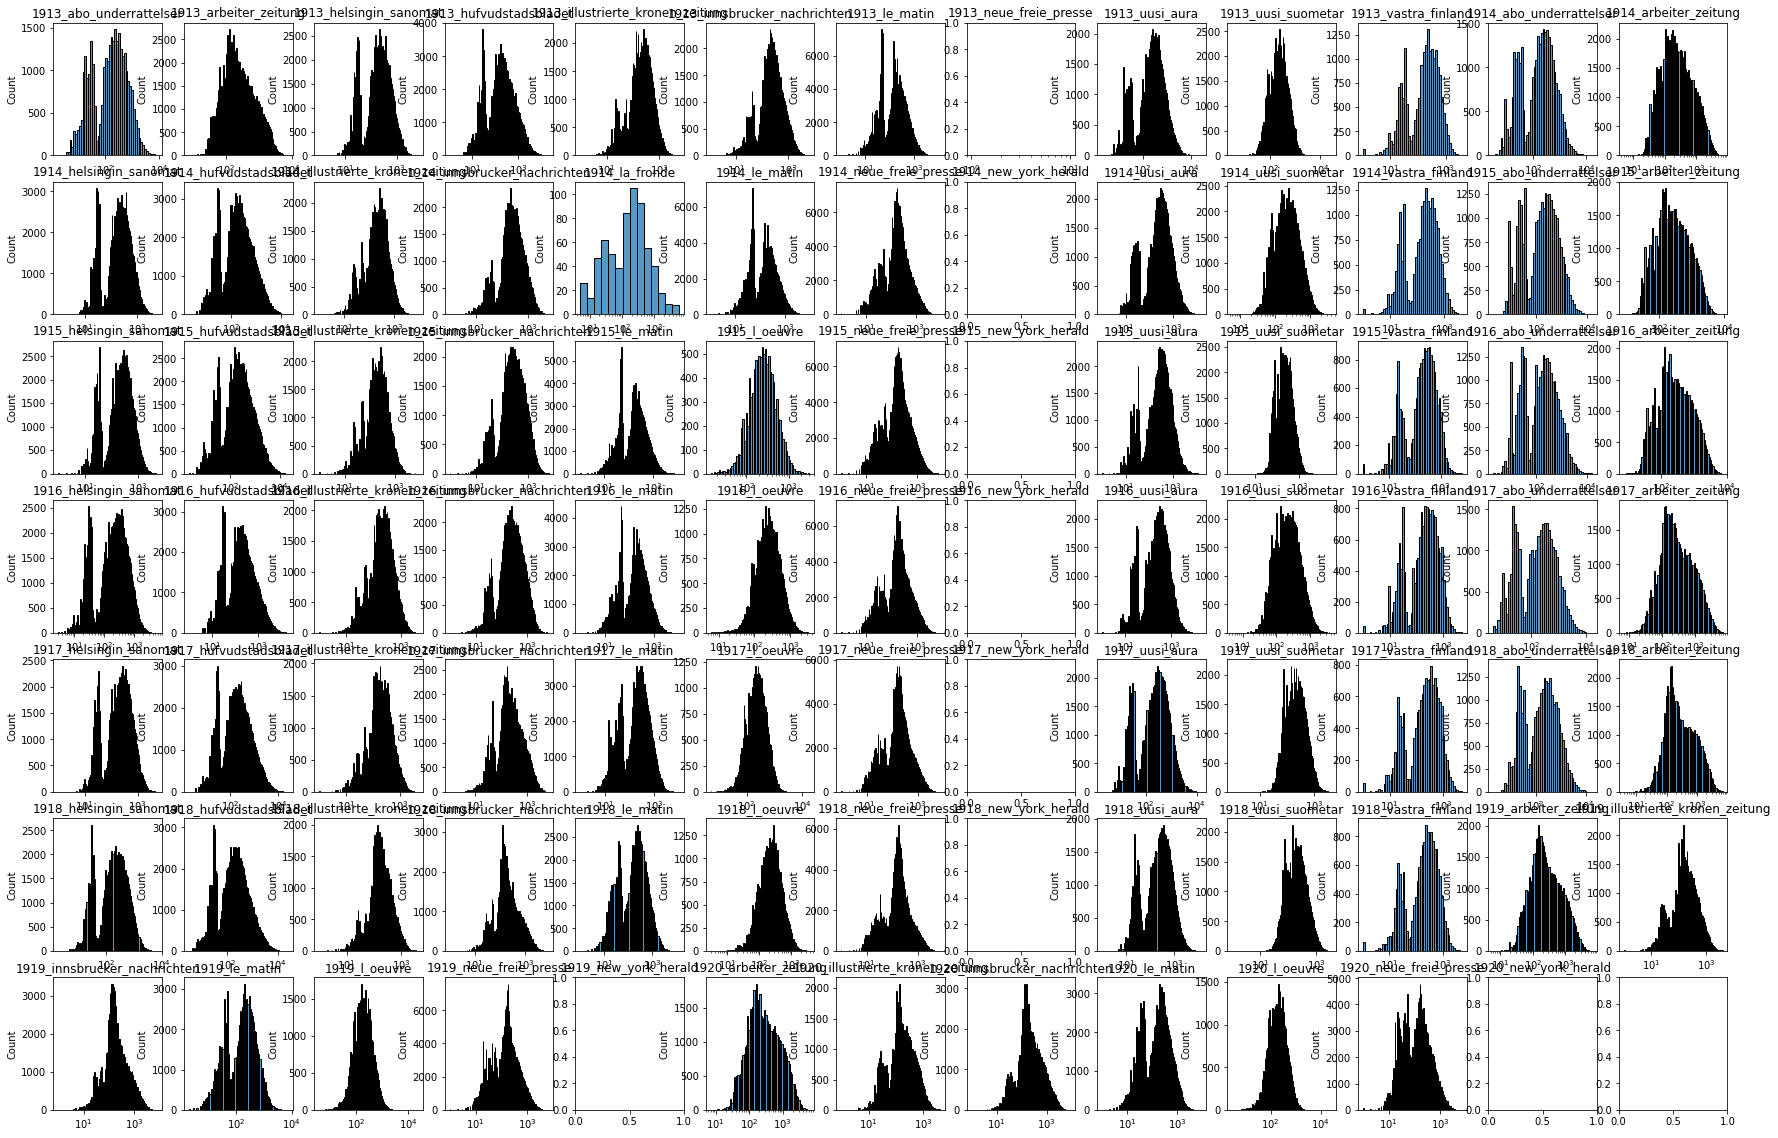

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(7, 13, figsize=(30, 20))
i = 0

for year in lengths:
    for journal in lengths[year]:
        try:
            sns.histplot(lengths[year][journal], ax=axes.flat[i], log_scale=True)
        except:
            pass
        axes.flat[i].set_title(f'{year}_{journal}')
        i += 1

### MultiBERT

In [1]:
!python3 --version

Python 3.6.9


In [2]:
from os.path import join
from os import listdir

listdir(join('multi_cased_L-12_H-768_A-12'))

['bert_config.json',
 'bert_model.ckpt.data-00000-of-00001',
 'bert_model.ckpt.index',
 'bert_model.ckpt.meta',
 'vocab.txt']

In [3]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('logs')
writer

In [4]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups()
len(news.data)

11314

In [39]:
import math

max_length = math.floor(np.mean([len(art.split()) for art in news.data]))

In [40]:
from transformers import BertTokenizer, BertModel

MODEL = 'bert-base-multilingual-cased'

tokenizer = BertTokenizer.from_pretrained(MODEL)

encoded_input = tokenizer(news.data[:10], padding=True, truncation=True, max_length=max_length, return_tensors='pt')

encoded_input['input_ids']

tensor([[  101, 12222,   131,  ...,     0,     0,     0],
        [  101, 12222,   131,  ...,     0,     0,     0],
        [  101, 12222,   131,  ..., 10124,   113,   102],
        ...,
        [  101, 12222,   131,  ...,   122,   119,   102],
        [  101, 12222,   131,  ...,     0,     0,     0],
        [  101, 12222,   131,  ..., 24909, 11614,   102]])

In [41]:
encoded_input['input_ids'].shape

torch.Size([10, 287])

In [42]:
import torch

model = BertModel.from_pretrained(MODEL, output_hidden_states=False, output_attentions=True)
# writer.add_graph(model)
model.eval()

with torch.no_grad():
    output = model(**encoded_input)

output.keys()

odict_keys(['last_hidden_state', 'pooler_output', 'attentions'])

### Visualization

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.figure(figsize=(20, 10))

layer_id = 5
sent_id = 0
head_id = 1

tokens = tokenizer.convert_ids_to_tokens(encoded_input['input_ids'][sent_id])
attention = pd.DataFrame(output.attentions[layer_id][sent_id][head_id].detach().numpy(), index=tokens, columns=tokens)

ax = sns.heatmap(attention, annot=True)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fda158a5d08> (for post_execute):


KeyboardInterrupt: 

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=2)

dims = output[0].shape

vectors = output[0].detach().numpy().reshape(dims[0]*dims[1], 768)

output_2d = pca.fit_transform(vectors)

In [45]:
tokens = ' '.join([' '.join(tokenizer.tokenize(tokenizer.batch_decode(encoded_input['input_ids'])[i])) for i in range(10)]).split()
' '.join(tokens)

'[CLS] From : ler ##x ##st @ wa ##m . um ##d . edu ( where \' s my thing ) Sub ##ject : W ##HA ##T car is this ! ? N ##nt ##p - Post ##ing - Host : ra ##c ##3 . wa ##m . um ##d . edu Organization : University of Maryland , College Park Lines : 15 I was won ##dering if anyone out there could en ##light ##en me on this car I saw the other day . It was a 2 - door sports car , looked to be from the late 60 ##s / early 70 ##s . It was called a Brick ##lin . The doors were really small . In addition , the front bu ##mper was separate from the rest of the body . This is all I know . If anyone can tell ##me a model name , engine sp ##ec ##s , years of production , where this car is made , history , or whatever info you have on this funk ##y looking car , pl ##eas ##e e - mail . Thank ##s , - IL - - - - brought to you by your neighborhood Le ##r ##x ##st - - - - [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [P

In [46]:
import tensorflow as tf
import tensorboard as tb
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

writer.add_embedding(vectors, metadata=tokens)
writer.close()

In [47]:
import pandas as pd

output_2d = pd.DataFrame(output_2d, columns=['x', 'y'])
output_2d.shape

(2870, 2)

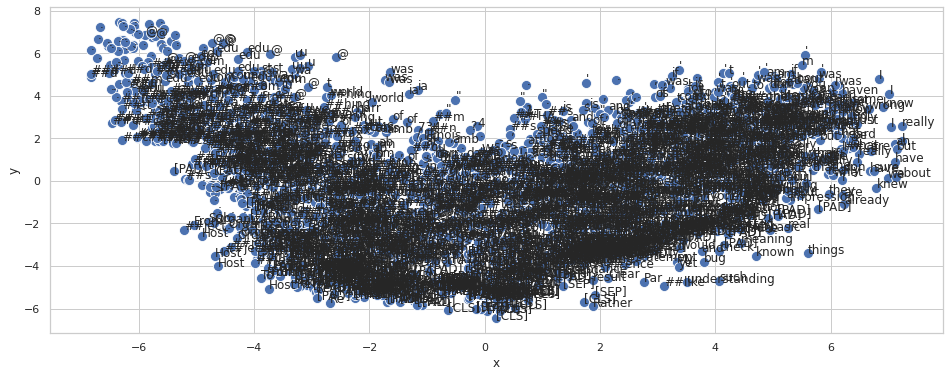

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))

sns.set(style='whitegrid')
 
scatter = sns.scatterplot(data=output_2d, x='x', y='y', s=100)

for i in range(output_2d.shape[0]): scatter.annotate(tokens[i], (output_2d.x[i], output_2d.y[i]))

In [49]:
%load_ext tensorboard
%tensorboard --logdir /home/vagrant/project/logs/ --host 0.0.0.0 --port 6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 2211), started 0:23:12 ago. (Use '!kill 2211' to kill it.)

In [29]:
!ps -fA | grep tensorboard

vagrant   2176  2114  2 23:11 ?        00:00:07 [tensorboard] <defunct>
vagrant   2208  2114 10 23:16 pts/1    00:00:00 /bin/bash -c ps -fA | grep tensorboard
vagrant   2210  2208  0 23:16 pts/1    00:00:00 grep tensorboard


In [21]:
!kill 2176

### Sources
- https://stackoverflow.com/questions/61250311/error-importing-bert-module-tensorflow-api-v2-train-has-no-attribute-optimi#
- https://medium.com/@armandj.olivares/using-bert-for-classifying-documents-with-long-texts-5c3e7b04573d
- https://huggingface.co/transformers/main_classes/output.html
- https://medium.com/analytics-vidhya/text-classification-with-bert-using-transformers-for-long-text-inputs-f54833994dfd
- https://towardsdatascience.com/transformers-141e32e69591
- https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html#adding-a-projector-to-tensorboard

#### Multilingual models
- https://huggingface.co/bert-base-multilingual-cased
- https://github.com/google-research/bert/blob/master/multilingual.md
- https://huggingface.co/transformers/multilingual.html

### References
- https://arxiv.org/abs/1810.04805
- https://www.aclweb.org/anthology/2020.tacl-1.54.pdf
- http://www.dhgarrette.com/papers/pires_multilingual_bert_acl2019.pdf